In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [13]:
# Read CSV File
df = pd.read_csv("../datasets/heat_map_full.csv")

# Print column names with index
for i, col in enumerate(df.columns):
    print(f"Column {i}: {col}")

df.head()

Column 0: subject_id
Column 1: study_id
Column 2: Atelectasis
Column 3: Cardiomegaly
Column 4: Consolidation
Column 5: Edema
Column 6: Enlarged Cardiomediastinum
Column 7: Fracture
Column 8: Lung Lesion
Column 9: Lung Opacity
Column 10: No Finding
Column 11: Pleural Effusion
Column 12: Pleural Other
Column 13: Pneumonia
Column 14: Pneumothorax
Column 15: Support Devices
Column 16: image_id
Column 17: mimic_image_file_path


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,image_id,mimic_image_file_path
0,10000980,50985099,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,6ad03ed1-97ee17ee-9cf8b320-f7011003-cd93b42d,datasets/mimic-cxr-jpg\files/p10/p10000980/s50...
1,10000980,51967283,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,943486a3-b3fa9ff7-50f5a769-7a62fcbb-f39b6da4,datasets/mimic-cxr-jpg\files/p10/p10000980/s51...
2,10000980,54577367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,cfb03587-782edf6c-1bf392e1-98196cd5-365d69e8,datasets/mimic-cxr-jpg\files/p10/p10000980/s54...
3,10000980,54935705,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,6ad819bb-bae74eb9-7b663e90-b8deabd7-57f8054a,datasets/mimic-cxr-jpg\files/p10/p10000980/s54...
4,10000980,54980801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,a75a1fbe-802065ad-717eb7c1-e2ce3552-646276a6,datasets/mimic-cxr-jpg\files/p10/p10000980/s54...


Column: Atelectasis
Column: Cardiomegaly
Column: Consolidation
Column: Edema
Column: Enlarged Cardiomediastinum
Column: Fracture
Column: Lung Lesion
Column: Lung Opacity
Column: No Finding
Column: Pleural Effusion
Column: Pleural Other
Column: Pneumonia
Column: Pneumothorax
Column: Support Devices
[1060, 11214, 5741, 17869, 3748, 661, 595, 2082, 0, 18841, 76, 16751, 30640, 2471]
[124698, 118358, 149718, 118947, 150726, 162089, 160571, 124592, 110725, 104000, 164394, 124777, 127159, 113714]
[33280, 32540, 7892, 19991, 5202, 3334, 4563, 37131, 55771, 39444, 1464, 11767, 7876, 50130]
[7458, 4384, 3145, 9689, 6820, 412, 767, 2691, 0, 4211, 562, 13201, 821, 181]


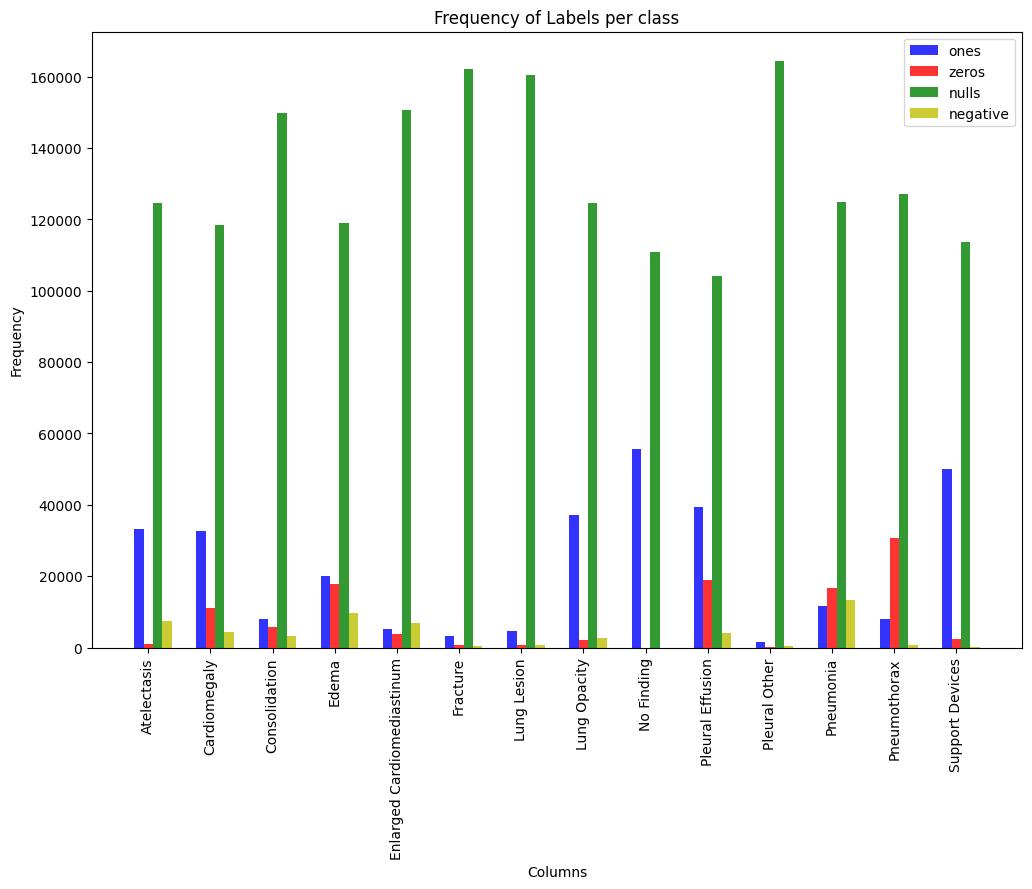

In [ ]:
# for each column calculate number of missing values 
zeros=[]
nulls=[]
ones=[]
negative=[]

for column in df.columns[2:16]:
    zeros.append((df[column]==0).sum())
    nulls.append( df[column].isnull().sum())
    ones.append((df[column]==1).sum())
    negative.append((df[column]==-1).sum())


# make a histogram of the number of ones and zeros in each column
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(df.columns[2:16]))
bar_width = 0.15
opacity = 0.8
rects1 = plt.bar(index, ones, bar_width, alpha=opacity, color='b', label='ones')
rects2 = plt.bar(index + bar_width, zeros, bar_width, alpha=opacity, color='r', label='zeros')
rects3 = plt.bar(index + 2*bar_width, nulls, bar_width, alpha=opacity, color='g', label='nulls')
rects4 = plt.bar(index + 3*bar_width, negative, bar_width, alpha=opacity, color='y', label='negative')

plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.title('Frequency of Labels per class')
plt.xticks(index + bar_width, df.columns[2:16], rotation='vertical')
plt.legend()
plt.show()


In [23]:

# 

# # print the results
# nulls=nulls[2:16]
# negative=negative[2:16]

# print(nulls)
# print(negative)
# # Replace Uncertain Labels
# df.iloc[:, 2:16] = df.iloc[:, 2:16].replace(np.nan, 0.0)
# df.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)
# # get the columns from 2 to 15
# df = df.iloc[:, 2:16]

# calculate the number of ones in each column alone with the column name
ones=[]
zeros=[]
for column in df:
    ones.append( df[column].sum())
    print("The number of ones in column",column,"is",df[column].sum())
    zeros.append( len(df[column])-df[column].sum())

# make a hisytogram of the number of ones and zeros in each column
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12, 8))
index = np.arange(len(df.columns))
bar_width = 0.15
opacity = 0.8
# draw the histogram
rects1 = plt.bar(index, ones, bar_width, alpha=opacity, color='b', label='ones')
rects2 = plt.bar(index + bar_width, zeros, bar_width, alpha=opacity, color='r', label='zeros')
rects3 = plt.bar(index + 2*bar_width, nulls, bar_width, alpha=opacity, color='g', label='nulls')
rects4 = plt.bar(index + 3*bar_width, negative, bar_width, alpha=opacity, color='y', label='negative')
# plt.xlabel('Columns')
plt.ylabel('Number of ones and zeros')
plt.title('Number of ones and zeros in each column')
# draw color map
plt.xticks(index + bar_width, df.columns, rotation='vertical')
plt.legend()
plt.show()

#calcualte the average number of ones in each columnalone 
average=[]
for i,column in enumerate(df):
    average.append( ones[i].sum()/len(df[column]))
    print("The average number of ones in column",column,"is",ones[i].sum()/len(df[column]))
print("The average number of ones in each column is:")
print(average)



## Ratios

In [4]:
# Calculate ratio of zeros to ones
zero_to_one_ratios = {column: zeros[i] / ones[i] if ones[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Calculate ratio of zeros and NaNs to counts of ones and negative ones
zero_nan_to_one_negative_ratios = {column: (zeros[i] + nulls[i]) / (ones[i] + negative[i]) if ones[i] + negative[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Print ratios
print("Ratio of Zeros to Ones:")
print(zero_to_one_ratios)
print("\nRatio of Zeros and NaNs to Ones and Negative Ones:")
print(zero_nan_to_one_negative_ratios)

Ratio of Zeros to Ones:
{'Atelectasis': 3.0869949432961854, 'Cardiomegaly': 3.5091539378182213, 'Consolidation': 14.085258675364683, 'Edema': 4.609703504043127, 'Enlarged Cardiomediastinum': 12.849276326734321, 'Fracture': 43.446342765616656, 'Lung Lesion': 30.2375234521576, 'Lung Opacity': 3.181005474360906, 'No Finding': 1.9853508095605243, 'Pleural Effusion': 2.813904478295728, 'Pleural Other': 81.1796643632774, 'Pneumonia': 5.668375520666453, 'Pneumothorax': 18.144072668736346, 'Support Devices': 2.309335930512214}

Ratio of Zeros and NaNs to Ones and Negative Ones:
{'Atelectasis': 5.196613826873599, 'Cardiomegaly': 6.001985087634356, 'Consolidation': 21.518615145959668, 'Edema': 6.496558205694836, 'Enlarged Cardiomediastinum': 16.197855853943317, 'Fracture': 78.12385762385762, 'Lung Lesion': 52.769722814498934, 'Lung Opacity': 5.910333309811117, 'No Finding': 3.9707016191210487, 'Pleural Effusion': 4.7390841098065435, 'Pleural Other': 127.0726429675425, 'Pneumonia': 6.976997039482

In [7]:
# Calculate ratio of zeros to ones
zero_to_one_ratios = {column: zeros[i] / ones[i] if ones[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Calculate ratio of zeros and NaNs to counts of ones and negative ones
zero_nan_to_one_negative_ratios = {column: (zeros[i] + nulls[i]) / (ones[i] + negative[i]) if ones[i] + negative[i] != 0 else float('inf') for i, column in enumerate(df.columns)}

# Print ratios
print("Ratio of Zeros to Ones:")
print(zero_to_one_ratios)
print("\nRatio of Zeros and NaNs to Ones and Negative Ones:")
print(zero_nan_to_one_negative_ratios)

Ratio of Zeros to Ones:
{'Atelectasis': 3.316472114137484, 'Cardiomegaly': 3.740740740740741, 'Consolidation': 13.406926406926408, 'Edema': 4.698630136986301, 'Enlarged Cardiomediastinum': 14.127272727272727, 'Fracture': 39.58536585365854, 'Lung Lesion': 25.624, 'Lung Opacity': 2.8563151796060255, 'No Finding': 1.955595026642984, 'Pleural Effusion': 3.3333333333333335, 'Pleural Other': 63.0, 'Pneumonia': 5.339047619047619, 'Pneumothorax': 16.51578947368421, 'Support Devices': 2.365015166835187}

Ratio of Zeros and NaNs to Ones and Negative Ones:
{'Atelectasis': 5.498381877022654, 'Cardiomegaly': 6.474903474903475, 'Consolidation': 20.883161512027492, 'Edema': 6.394769613947696, 'Enlarged Cardiomediastinum': 18.106194690265486, 'Fracture': 71.25274725274726, 'Lung Lesion': 45.7, 'Lung Opacity': 5.2894168466522675, 'No Finding': 3.911190053285968, 'Pleural Effusion': 5.623067776456599, 'Pleural Other': 100.78461538461538, 'Pneumonia': 6.602756892230577, 'Pneumothorax': 27.21904761904762,